<h2><a href="https://leetcode.com/problems/array-partition">561. Array Partition</a></h2><h3>Easy</h3><hr><p>Given an integer array <code>nums</code> of <code>2n</code> integers, group these integers into <code>n</code> pairs <code>(a<sub>1</sub>, b<sub>1</sub>), (a<sub>2</sub>, b<sub>2</sub>), ..., (a<sub>n</sub>, b<sub>n</sub>)</code> such that the sum of <code>min(a<sub>i</sub>, b<sub>i</sub>)</code> for all <code>i</code> is <strong>maximized</strong>. Return<em> the maximized sum</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> nums = [1,4,3,2]
<strong>Output:</strong> 4
<strong>Explanation:</strong> All possible pairings (ignoring the ordering of elements) are:
1. (1, 4), (2, 3) -&gt; min(1, 4) + min(2, 3) = 1 + 2 = 3
2. (1, 3), (2, 4) -&gt; min(1, 3) + min(2, 4) = 1 + 2 = 3
3. (1, 2), (3, 4) -&gt; min(1, 2) + min(3, 4) = 1 + 3 = 4
So the maximum possible sum is 4.</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> nums = [6,2,6,5,1,2]
<strong>Output:</strong> 9
<strong>Explanation:</strong> The optimal pairing is (2, 1), (2, 5), (6, 6). min(2, 1) + min(2, 5) + min(6, 6) = 1 + 2 + 6 = 9.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= n &lt;= 10<sup>4</sup></code></li>
	<li><code>nums.length == 2 * n</code></li>
	<li><code>-10<sup>4</sup> &lt;= nums[i] &lt;= 10<sup>4</sup></code></li>
</ul>


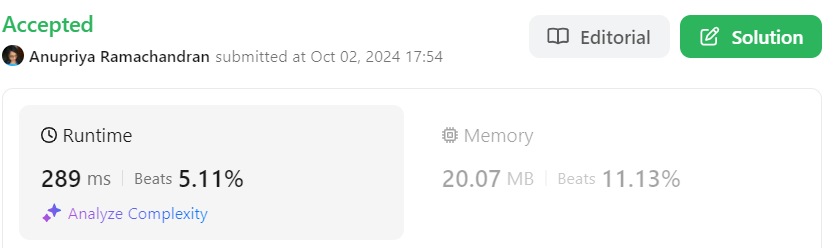

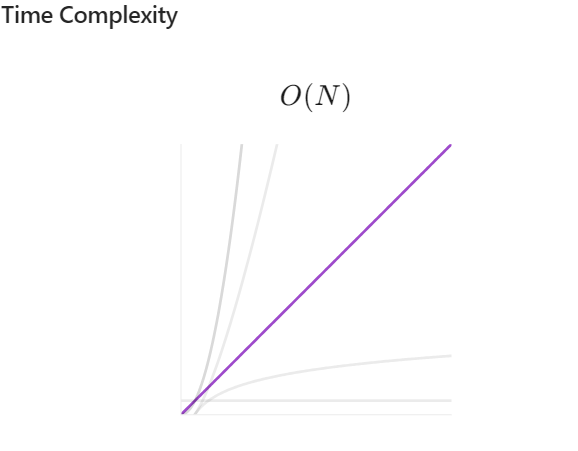

In [1]:
# Counting Sort- considering both Negative and positive numbers
from typing import List

class Solution:
    def arrayPairSum(self, nums: List[int]) -> int:
        min_val = min(nums)
        max_val = max(nums)

        count = [0]*(max_val - min_val + 1)

        # take count
        for num in nums:
            count[num- min_val] += 1

        # cumulative sum
        for i in range(1, len(count)):
            count[i] += count[i-1]

        # Create output array
        output = [0]* len(nums)
        for num in nums:
            output[count[num- min_val] - 1] = num
            count[num - min_val] -= 1
        
        # Get sum of pairs
        i, j = 0, 1
        sum_ = 0
        while j < len(nums):
            sum_ += min(output[i], output[j])
            i += 2
            j += 2
        return sum_